In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asdasdasd/uci-secom.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('/kaggle/input/asdasdasd/uci-secom.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## Collinearity Removal

In [4]:
def remove_collinear_features(x, threshold):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                print(col.values[0], '|', row.values[0], '|', round(val[0][0], 2))
                drop_cols.append(col.values[0])
                
    drops = set(drop_cols)
    x = x.drop(columns=drops)
            
    return x

## Preprocessing procedures


In [5]:
def data_preprocess(data, th = 0.95):
    
    data = data.replace(np.NaN, 0)
    data = remove_collinear_features(data, th)
    data = data.drop(columns = ['Time'], axis = 1)
    
    # - 항상 같은 값인 column 삭제 
    dupList = []
    for col in data.columns:
        if len(data.loc[:,col].value_counts()) == 1:
            dupList.append(col)
    
    data = data.drop(dupList, axis = 1)
    
    return data

def split_x_y(data):
    
    x = data.iloc[:, :306]
    y = data['Pass/Fail']
    
    return x, y

def train_val_test_split(x, y, random_state = 42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = random_state)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = random_state)
    
    print('x_train shape :', x_train.shape)
    print('y_train shape :', y_train.shape)

    print('x_test shape :', x_test.shape)
    print('y_test shape :', y_test.shape)

    print('x_val shape :', x_val.shape)
    print('y_val shape :', y_val.shape)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

def standardization(x_train, x_val, x_test):
    sc = StandardScaler()
    sc.fit(x_train)
    x_train = sc.transform(x_train)
    x_val = sc.transform(x_val)
    x_test = sc.transform(x_test)
    
    return x_train, x_val, x_test

def y_change(y):
    y_np = np.array(y)
    y_np = np.where(y_np == -1, 0, 1)
    return y_np

In [6]:
data_pre = data_preprocess(data)
X, y = split_x_y(data_pre)
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)
X_train, X_val, X_test = standardization(X_train, X_val, X_test)
y_train, y_val, y_test = y_change(y_train), y_change(y_val), y_change(y_test)

5 | 2 | 0.99
27 | 25 | 0.98
38 | 37 | 0.97
49 | 42 | 1.0
50 | 46 | 0.97
54 | 53 | 1.0
55 | 53 | 0.95
56 | 53 | 0.98
56 | 54 | 0.97
56 | 55 | 0.96
57 | 53 | 0.97
57 | 54 | 0.96
57 | 55 | 0.98
57 | 56 | 0.99
58 | 56 | 0.96
66 | 60 | 0.97
69 | 60 | 0.96
69 | 66 | 0.97
70 | 60 | 0.97
70 | 66 | 0.99
70 | 69 | 0.97
73 | 72 | 0.98
96 | 94 | 0.96
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
110 | 109 | 1.0
111 | 109 | 1.0
111 | 110 | 1.0
123 | 121 | 1.0
124 | 121 | 1.0
124 | 123 | 1.0
127 | 122 | 0.97
131 | 121 | 1.0
131 | 123 | 0.99
131 | 124 | 0.99
133 | 132 | 0.95
140 | 4 | 1.0
148 | 16 | 0.96
152 | 16 | 0.96
152 | 148 | 0.99
165 | 164 | 0.96
174 | 172 | 1.0
206 | 74 | 1.0
209 | 74 | 1.0
209 | 206 | 1.0
220 | 85 | 0.97
246 | 244 | 0.96
246 | 245 | 0.98
249 | 114 | 0.98
252 | 117 | 0.99
271 | 136 | 0.97
272 | 137 | 0.98
274 | 139 | 0.99
275 | 4 | 1.0
275 | 140 | 1.0
277 | 142 | 0.98
279 | 144 | 0.98
280 | 145 | 0.96
281 | 146 | 0.95
282 | 147 | 1.0
283 | 16 | 0.96
283 | 148 | 1.0
283 | 15

### Tensorflos Keras Modeling
- 32-16-8-4-2 1d layers
- Activation : ReLU 
- Loss function : cross-entropy / Optimizer : Adam

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu',input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax'),    
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [8]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.3621 - val_loss: 0.2092
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1979 - val_loss: 0.1560
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1408 - val_loss: 0.1326
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1058 - val_loss: 0.1131
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0821 - val_loss: 0.0964
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0667 - val_loss: 0.0881
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0851
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.0829
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0482 - val_loss: 0.0834
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0450 - val_loss: 0.0747
Epoch 11/

## Metric

In [9]:
def cal_metric(x_test, model):
    y_pred = np.argmax(model.predict(x_test), axis = 1)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    tp = cm[0,0]
    fn = cm[0,1]
    fp = cm[1,0]
    tn = cm[1,1]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*precision*recall / (precision + recall)
    acc = (tp+tn) / (tp+fn+fp+tn)
    print('precision : ', precision)
    print('recall : ', recall)
    print('f1 : ', f1)
    print('acc : ', acc)
    
    return cm, precision, recall, f1, acc

In [10]:
cal_metric(X_test,model)

5/5 [==============================] - 0s 2ms/step
[[141   0]
 [ 12   4]]
precision :  0.9215686274509803
recall :  1.0
f1 :  0.9591836734693878
acc :  0.9235668789808917


(array([[141,   0],
        [ 12,   4]]),
 0.9215686274509803,
 1.0,
 0.9591836734693878,
 0.9235668789808917)

5/5 [==============================] - 0s 2ms/step


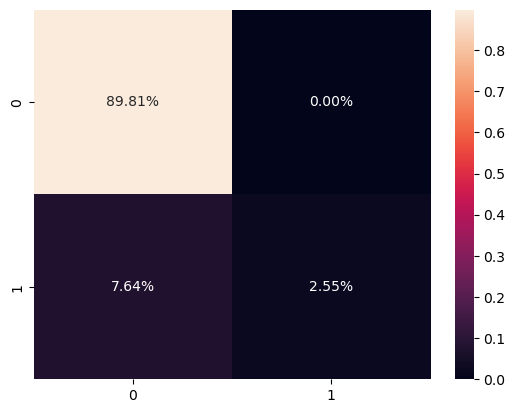

In [11]:
y_pred = np.argmax(model.predict(X_test), axis =1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm),fmt='.2%', annot = True)
plt.show()